In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
sns.set()

In [115]:
# Read in the combined data-scaled 
df=pd.read_csv("../Data_processed/combined_features_scaled.csv", index_col=0)

In [343]:
df.head(3)

,age,income,CO,DE,FR,GB,JP,MX,RU,TW,...,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.888889,1.0,0.0,0.903308,0.844444,0.622549,0.651282,0.894713,0.696177
1,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.722222,0.111111,1.0,0.0,0.233918,0.550000,0.352246,0.371212,0.568889,0.272222
2,0.222222,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.266667,0.0,1.0,0.198413,0.407407,0.246032,0.257971,0.582222,0.532475


## KMean models and visualization via TSNE and PCA

In [117]:
# Run K-Means with diffent k
df_copy = df.copy()

kmeans2 = KMeans(n_clusters=2, random_state=0)
df_copy["2-label"]=pd.Series(kmeans2.fit_predict(df.to_numpy()))

kmeans3 = KMeans(n_clusters=3, random_state=0)
df_copy["3-label"]=pd.Series(kmeans3.fit_predict(df.to_numpy()))

kmeans4 = KMeans(n_clusters=4, random_state=0)
df_copy["4-label"]=pd.Series(kmeans4.fit_predict(df.to_numpy()))

kmeans5 = KMeans(n_clusters=5, random_state=0)
df_copy["5-label"]=pd.Series(kmeans5.fit_predict(df.to_numpy()))

kmeans6 = KMeans(n_clusters=6, random_state=0)
df_copy["6-label"]=pd.Series(kmeans6.fit_predict(df.to_numpy()))

kmeans7 = KMeans(n_clusters=7, random_state=0)
df_copy["7-label"]=pd.Series(kmeans7.fit_predict(df.to_numpy()))

kmeans8 = KMeans(n_clusters=8, random_state=0)
df_copy["8-label"]=pd.Series(kmeans8.fit_predict(df.to_numpy()))

kmeans9 = KMeans(n_clusters=9, random_state=0)
df_copy["9-label"]=pd.Series(kmeans9.fit_predict(df.to_numpy()))

kmeans10 = KMeans(n_clusters=10, random_state=0)
df_copy["10-label"]=pd.Series(kmeans10.fit_predict(df.to_numpy()))

# Now there are labels
df_copy.head(3)

,age,income,CO,DE,FR,GB,JP,MX,RU,TW,...,n_days_on_platform,2-label,3-label,4-label,5-label,6-label,7-label,8-label,9-label,10-label
0,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.696177,0,0,0,1,1,5,7,1,7
1,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.272222,0,0,0,1,1,2,4,8,5
2,0.222222,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.532475,0,1,1,4,5,3,2,2,2


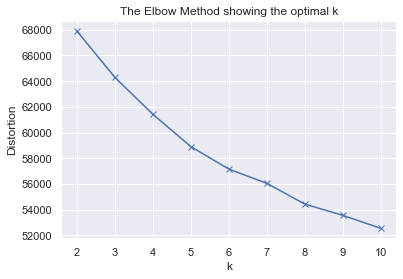

In [118]:
# k means determine k
distortions = []
K = range(2,11)

distortions.append(kmeans2.inertia_)
distortions.append(kmeans3.inertia_)
distortions.append(kmeans4.inertia_)
distortions.append(kmeans5.inertia_)
distortions.append(kmeans6.inertia_)
distortions.append(kmeans7.inertia_)
distortions.append(kmeans8.inertia_)
distortions.append(kmeans9.inertia_)
distortions.append(kmeans10.inertia_)

# Plot the elbow. No elbow detected. 
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [119]:
# TSNE to create 2D plots
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6079 samples in 0.053s...
[t-SNE] Computed neighbors for 6079 samples in 16.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6079
[t-SNE] Computed conditional probabilities for sample 2000 / 6079
[t-SNE] Computed conditional probabilities for sample 3000 / 6079
[t-SNE] Computed conditional probabilities for sample 4000 / 6079
[t-SNE] Computed conditional probabilities for sample 5000 / 6079
[t-SNE] Computed conditional probabilities for sample 6000 / 6079
[t-SNE] Computed conditional probabilities for sample 6079 / 6079
[t-SNE] Mean sigma: 1.113819
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.512161
[t-SNE] KL divergence after 300 iterations: 2.354017
t-SNE done! Time elapsed: 46.33946180343628 seconds


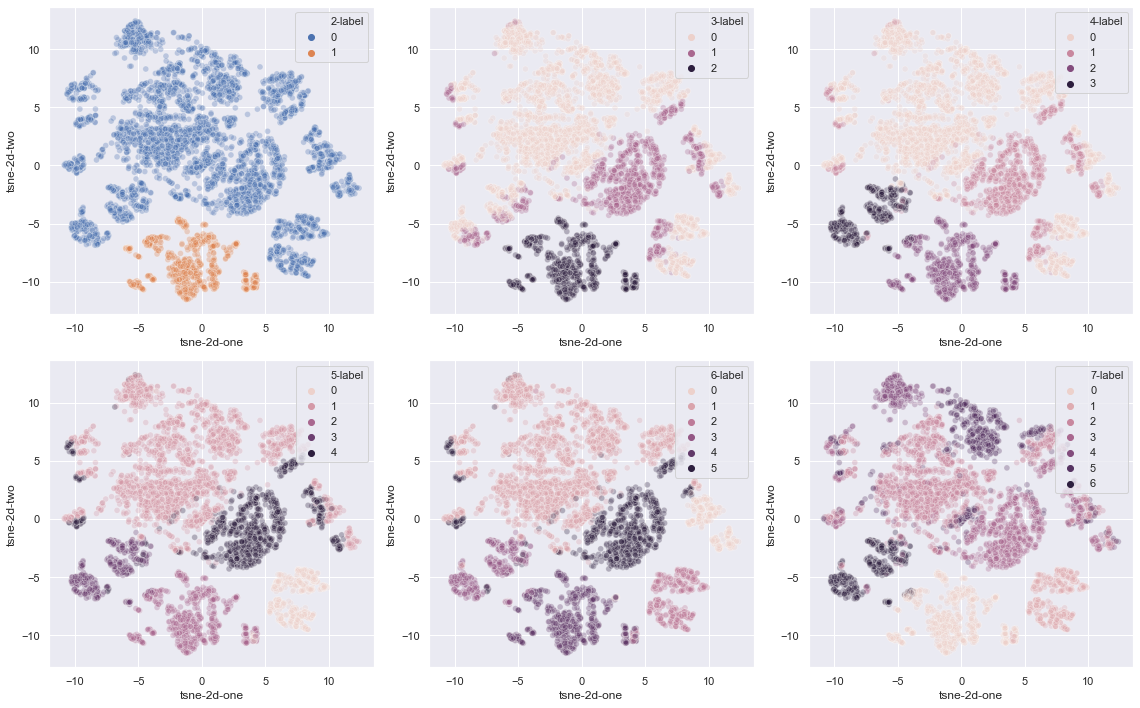

In [121]:
df_copy["tsne-2d-one"] = tsne_results[:,0]
df_copy["tsne-2d-two"] = tsne_results[:,1]
fig, ax =plt.subplots(figsize=(16, 10))
plt.subplot(2,3,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="2-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="3-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,3)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="4-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,4)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="5-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,5)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="6-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,6)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="7-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.tight_layout()
fig.savefig("../Data_processed/tsne.png", dpi=900)

In [122]:
# PCA to create 2D plots
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
df_copy=pd.concat([df_copy, pd.DataFrame(pca.fit_transform(df), columns=["pca-1", "pca-2"])],axis=1)

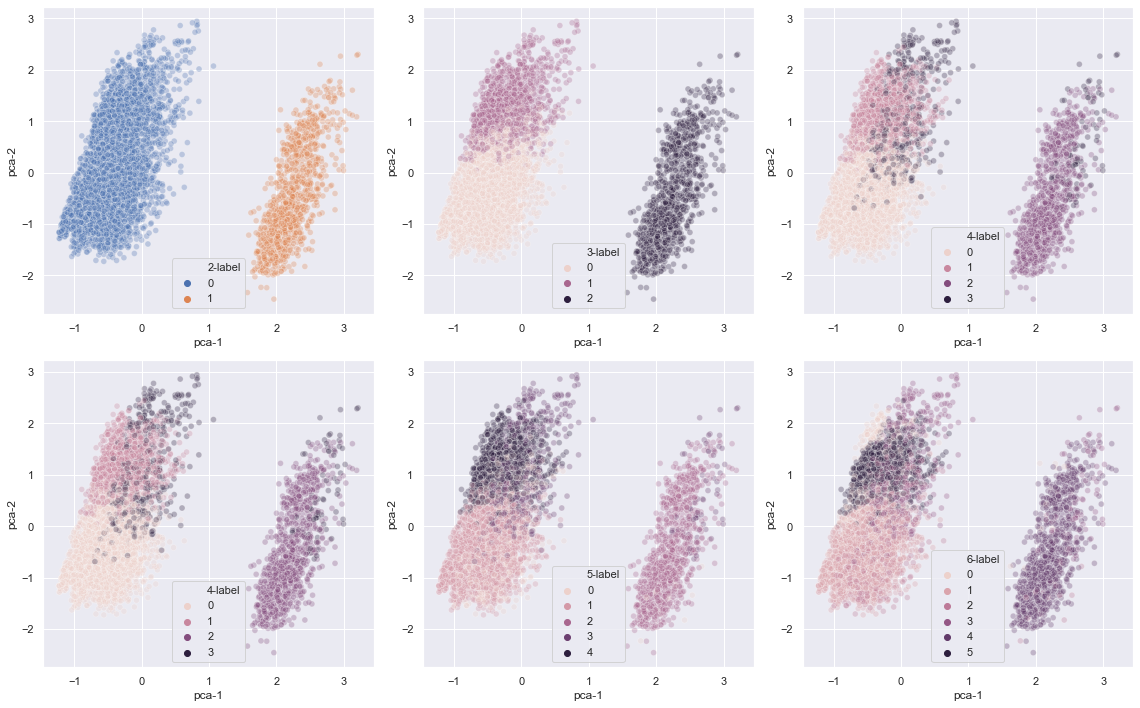

In [124]:
fig, ax=plt.subplots(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="2-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,2)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="3-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,3)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="4-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,4)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="4-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,5)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="5-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.subplot(2,3,6)
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="6-label",
    data=df_copy,
    legend="full",
    alpha=0.3
)
plt.tight_layout()
fig.savefig("../Data_processed/pca.png", dpi=900)

## Get insights!

In [127]:
# To interpret the label, we read the combined (non-numerica version). 
combined=pd.read_csv("../Data_processed/combined.csv", index_col=0)

In [218]:
combined.columns[1:17]

Index(['age', 'income', 'nation', 'platform', 'subscriber', 'usage',
       'employment', 'contact', 'gender', 'commitment', 'review', 'motivation',
       'level', 'student', 'survey_comp', 'survey_time'],
      dtype='object')

In [184]:
combined.columns[132:]

Index(['duolingo_start_date', 'daily_goal', 'highest_course_progress',
       'took_placement_test', 'purchased_subscription', 'highest_crown_count',
       'n_active_days', 'n_lessons_started', 'n_lessons_completed',
       'longest_streak', 'n_days_on_platform'],
      dtype='object')

In [211]:
# These columns include the vocabulary from 
# combined.columns[17:44] resources
# combined.columns[44:132] motivation followup

Index(['apps', 'book', 'child', 'class', 'conversation', 'etc', 'event',
       'group', 'in', 'language', 'meet', 'movie', 'novel', 'online', 'others',
       'person', 'please', 'private', 'show', 'speak', 'specify', 'story',
       'textbook', 'textbooks', 'tutor', 'tv', 'ups'],
      dtype='object')

In [131]:
# Create a copy of 'combined' and add the label 
combined_label = combined.copy()
combined_label["label"]=df_copy["2-label"]

In [256]:
# First, check the size of each group. 
print(combined_label.groupby("label").size())
# sns.countplot(combined_label.label)

label
0    5102
1     977
dtype: int64


In [344]:
#### Check the averages of features aggregated by groups
(combined_label.groupby(["label"]).mean()).iloc[:, :5]

,income,commitment,motivation,survey_comp,survey_time
label,,,,,
0,1.441004,2.394159,3.711682,0.915719,480.496276
1,1.453429,2.824974,4.483112,0.976459,533.658137


In [241]:
# Check the averages of features aggregated by groups
(combined_label.groupby(["label"]).mean()).iloc[:, 120:]

,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
label,,,,,,,,,,
0,11.074481,26.394355,0.409251,0.313211,97.674245,49.109761,241.018620,225.140729,149.282438,597.956684
1,12.308086,32.047083,0.502559,0.324463,123.438076,49.370522,250.362334,233.523030,175.561924,705.241556


In [242]:
# Check the averages of features aggregated by groups
(combined_label.groupby(["label"]).median()).iloc[:, :5]

,income,commitment,motivation,survey_comp,survey_time
label,,,,,
0,2.0,2.0,3.0,1.0,324.0
1,2.0,3.0,4.0,1.0,335.0


In [243]:
# Check the averages of features aggregated by groups
(combined_label.groupby(["label"]).median()).iloc[:, 120:]

,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
label,,,,,,,,,,
0,0.0,25.0,False,False,71.0,45.0,156.0,144.0,17.0,394.5
1,0.0,31.0,True,False,94.0,45.0,178.0,156.0,17.0,535.0


In [266]:
df_analyze=df_copy.iloc[:,:169]
df_analyze.head(3)

,age,income,CO,DE,FR,GB,JP,MX,RU,TW,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,2-label
0,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.888889,1.0,0.0,0.903308,0.844444,0.622549,0.651282,0.894713,0.696177,0
1,0.222222,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.111111,1.0,0.0,0.233918,0.550000,0.352246,0.371212,0.568889,0.272222,0
2,0.222222,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.266667,0.0,1.0,0.198413,0.407407,0.246032,0.257971,0.582222,0.532475,0


In [279]:
# Get indices of observations with label 0, and 1 respectively, 
# and undersample to have balanced dataset. 
labelone_size=len(df_analyze[df_analyze["2-label"]==1])
labelzero_indices=df_analyze[df_analyze["2-label"]==0].index
random_indices = np.random.choice(labelzero_indices, labelone_size, replace=False)
labelone_indices = df_analyze[df_analyze["2-label"]==1].index
balanced_indices = np.concatenate([labelone_indices,random_indices])

In [341]:
balanced_df = combined_label.loc[balanced_indices]
balanced_df.head(3)

,id,age,income,nation,platform,subscriber,usage,employment,contact,gender,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,label
7,35ca023572c911e99fa5dca9049399ef,Y,2,JP,A,YES,D,F,Yes,Female,...,7.0,False,True,28.0,20,181.0,179.0,20,19,1
9,35ca038a72c911e9bc47dca9049399ef,M,2,JP,I,NVR,M,F,No,Female,...,57.0,False,False,210.0,35,77.0,69.0,14,967,1
10,35ca043572c911e9bd63dca9049399ef,Y,2,JP,I,YES,D,F,Yes,Female,...,58.0,True,True,263.0,76,228.0,222.0,611,1916,1


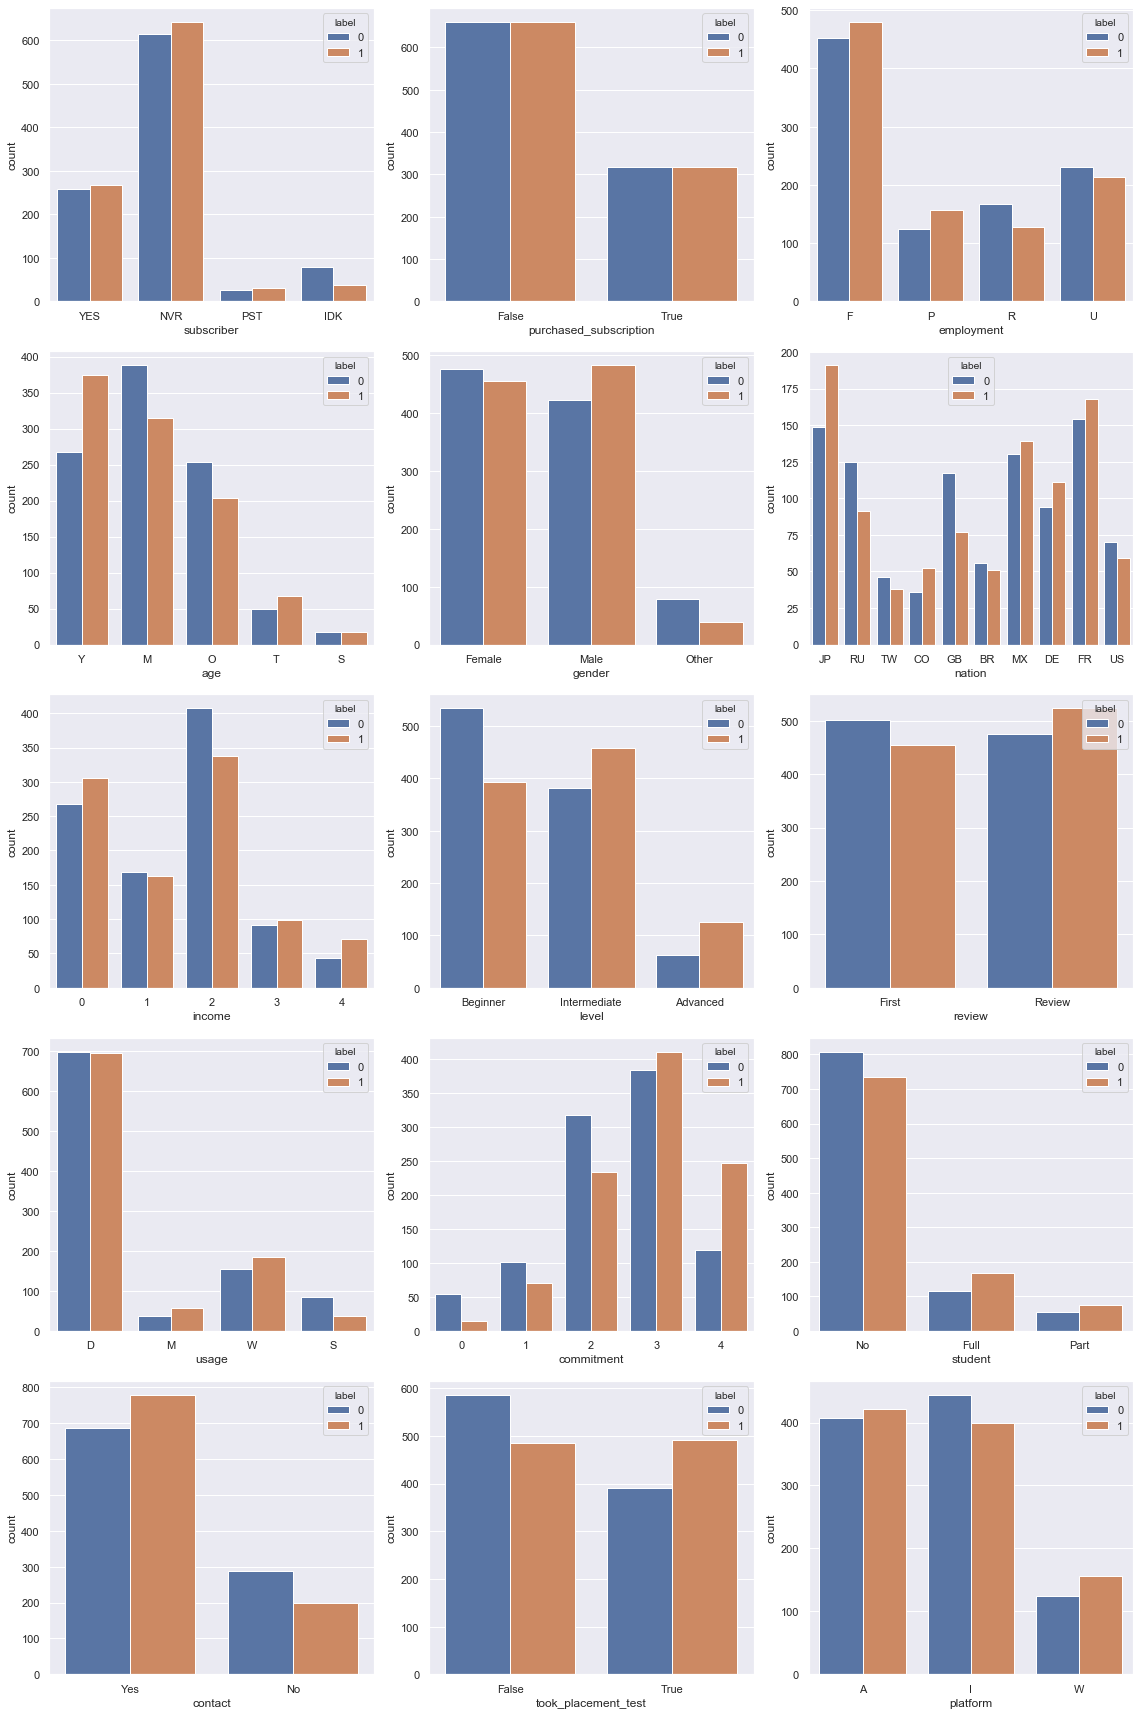

In [346]:
# Plotting two now-balanced-group statistics--Categorical 
fig, ax=plt.subplots(figsize=(16,24))
plt.subplot(5,3,1)
sns.countplot(data=balanced_df, x="subscriber", hue="label")
plt.subplot(5,3,10)
sns.countplot(data=balanced_df, x="usage", hue="label")
plt.subplot(5,3,3)
sns.countplot(data=balanced_df, x="employment", hue="label")
plt.subplot(5,3,15)
sns.countplot(data=balanced_df, x="platform", hue="label")
plt.subplot(5,3,4)
sns.countplot(data=balanced_df, x="age", hue="label")
plt.subplot(5,3,5)
sns.countplot(data=balanced_df, x="gender", hue="label")
plt.subplot(5,3,7)
sns.countplot(data=balanced_df, x="income", hue="label")
plt.subplot(5,3,6)
sns.countplot(data=balanced_df, x="nation", hue="label")
plt.subplot(5,3,9)
sns.countplot(data=balanced_df, x="review", hue="label")
plt.subplot(5,3,12)
sns.countplot(data=balanced_df, x="student", hue="label")
plt.subplot(5,3,14)
sns.countplot(data=balanced_df, x="took_placement_test", hue="label")
plt.subplot(5,3,13)
sns.countplot(data=balanced_df, x="contact", hue="label")
plt.subplot(5,3,11)
sns.countplot(data=balanced_df, x="commitment", hue="label")
plt.subplot(5,3,8)
sns.countplot(data=balanced_df, x="level", hue="label")
plt.subplot(5,3,2)
sns.countplot(data=balanced_df, x="purchased_subscription", hue="label")

    
plt.tight_layout()
fig.savefig("../Data_processed/groups_categorical.png", dpi=900)

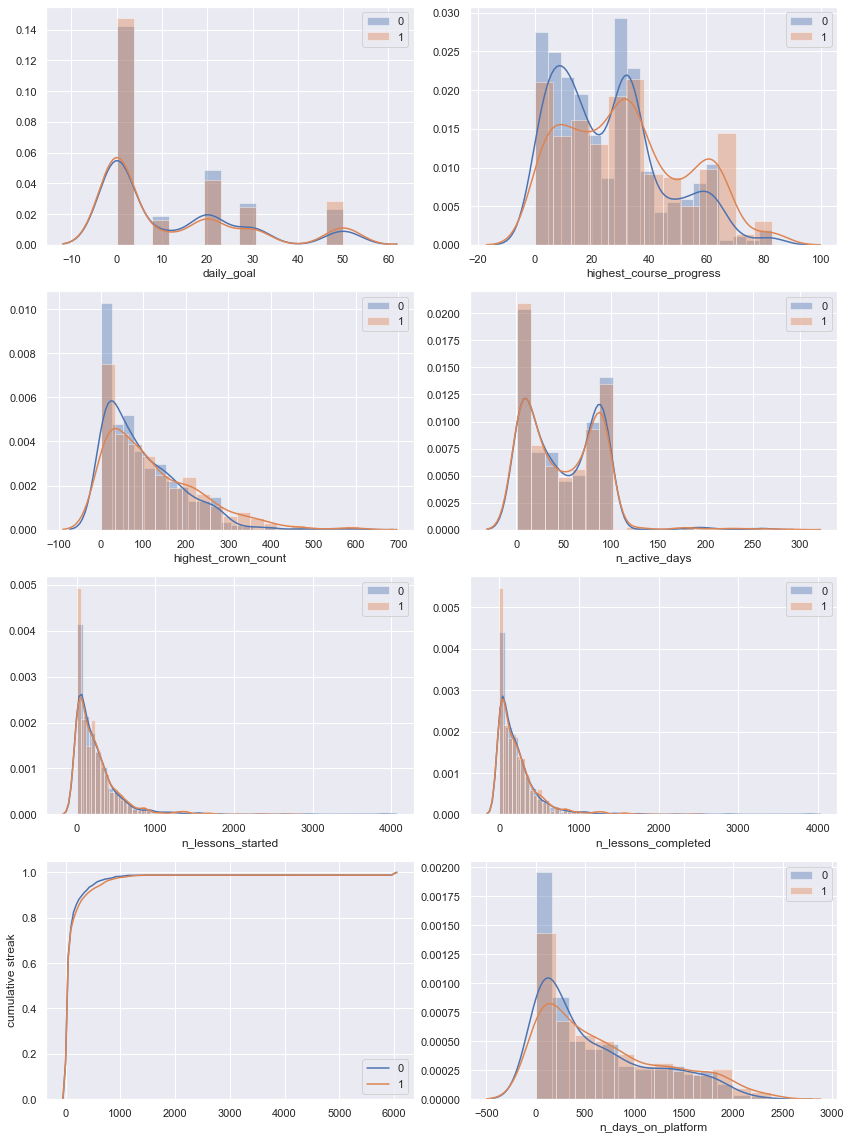

In [348]:
# Plotting two now-balanced-group statistics--Numerical 
balanced_zero=balanced_df[balanced_df.label==0]
balanced_one=balanced_df[balanced_df.label==1]

fig, ax=plt.subplots(figsize=(12,16))
plt.subplot(4,2,1)
sns.distplot(balanced_zero.daily_goal, label="0", hist=True)
sns.distplot(balanced_one.daily_goal, label="1", hist=True)
plt.legend()

plt.subplot(4,2,2)
sns.distplot(balanced_zero.highest_course_progress, label="0",hist=True)
sns.distplot(balanced_one.highest_course_progress,label="1", hist=True)
plt.legend()

plt.subplot(4,2,3)
sns.distplot(balanced_zero.highest_crown_count, label="0", hist=True)
sns.distplot(balanced_one.highest_crown_count, label="1",hist=True)
plt.legend()

plt.subplot(4,2,4)
sns.distplot(balanced_zero.n_active_days,label="0", hist=True)
sns.distplot(balanced_one.n_active_days,label="1", hist=True)
plt.legend()

plt.subplot(4,2,5)
sns.distplot(balanced_zero.n_lessons_started, label="0", hist=True)
sns.distplot(balanced_one.n_lessons_started, label="1",hist=True)
plt.legend()

plt.subplot(4,2,6)
sns.distplot(balanced_zero.n_lessons_completed, label="0",hist=True)
sns.distplot(balanced_one.n_lessons_completed, label="1",hist=True)
plt.legend()

plt.subplot(4,2,7)
sns.kdeplot(balanced_zero.longest_streak, cumulative=True, label="0")
sns.kdeplot(balanced_one.longest_streak, cumulative=True, label="1")
plt.ylabel("cumulative streak")
plt.legend()

plt.subplot(4,2,8)
sns.distplot(balanced_zero.n_days_on_platform, label="0", hist=True)
sns.distplot(balanced_one.n_days_on_platform, label="1", hist=True)
plt.legend()

plt.tight_layout()
fig.savefig("../Data_processed/groups_numerical.png", dpi=900)

In [331]:
# Matrix too big, not that useful 
df_analyze.corr()

,age,income,CO,DE,FR,GB,JP,MX,RU,TW,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,2-label
age,1.000000,0.341550,-0.072222,0.080786,0.091176,-0.023533,-0.008862,0.092071,0.044018,-0.080112,...,0.154196,0.069749,0.186132,0.264436,0.294488,0.296263,0.293356,0.229338,0.083084,-0.089662
income,0.341550,1.000000,-0.069953,-0.016889,0.078166,0.003972,0.225719,0.074813,-0.079395,-0.019882,...,0.134155,0.013217,0.276304,0.174400,0.192831,0.176418,0.176272,0.190127,0.086522,-0.005389
CO,-0.072222,-0.069953,1.000000,-0.076828,-0.101187,-0.079320,-0.094682,-0.094431,-0.081093,-0.049742,...,0.078979,-0.029572,-0.147751,-0.039455,-0.063265,-0.046809,-0.043435,-0.072634,0.029289,0.006117
DE,0.080786,-0.016889,-0.076828,1.000000,-0.147170,-0.115366,-0.137710,-0.137344,-0.117944,-0.072346,...,-0.091024,0.061752,-0.201959,-0.036923,-0.071023,-0.047630,-0.047100,-0.081562,-0.057112,0.019070
FR,0.091176,0.078166,-0.101187,-0.147170,1.000000,-0.151945,-0.181373,-0.180892,-0.155340,-0.095285,...,-0.001675,0.114865,0.211331,0.101133,0.117042,0.102787,0.104961,0.127316,-0.012274,0.011383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n_lessons_started,0.296263,0.176418,-0.046809,-0.047630,0.102787,-0.113080,0.065742,0.099017,0.107834,-0.072882,...,0.382369,0.137611,0.426129,0.617004,0.786608,1.000000,0.992916,0.755842,0.076231,0.010291
n_lessons_completed,0.293356,0.176272,-0.043435,-0.047100,0.104961,-0.111527,0.062825,0.096518,0.106325,-0.067699,...,0.385657,0.143932,0.424162,0.619379,0.784959,0.992916,1.000000,0.764102,0.077150,0.007795
longest_streak,0.229338,0.190127,-0.072634,-0.081562,0.127316,-0.053216,0.095370,0.090131,0.046403,-0.093331,...,0.434306,0.083897,0.421384,0.632922,0.853767,0.755842,0.764102,1.000000,0.206898,0.002439
n_days_on_platform,0.083084,0.086522,0.029289,-0.057112,-0.012274,-0.092989,0.103174,0.016654,0.065563,0.008589,...,0.531964,-0.028760,0.115365,0.427257,0.253141,0.076231,0.077150,0.206898,1.000000,0.066224


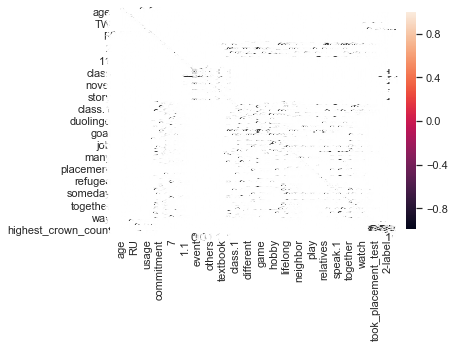

In [332]:
sns.heatmap(df_analyze.corr(), annot=True)

Here are some plots created before undersampling. The plots are not as easy to interpret. 

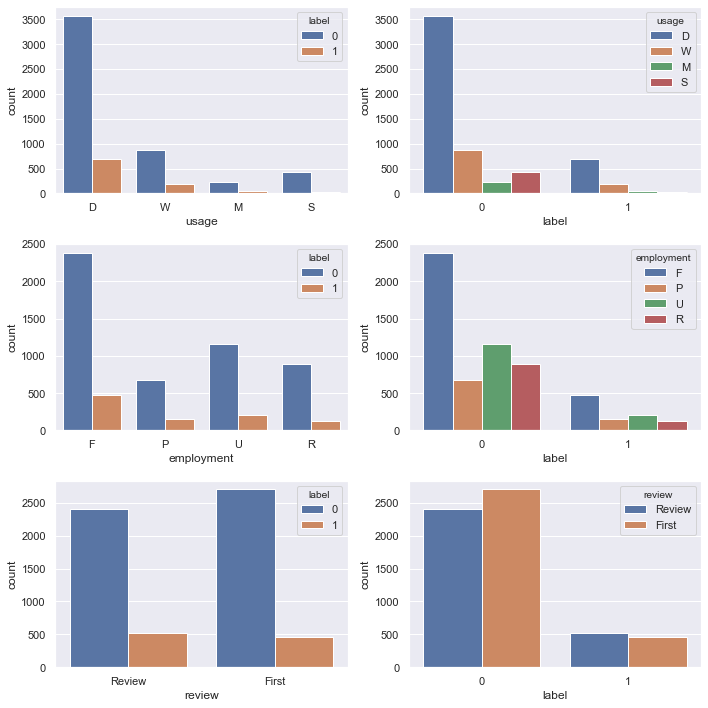

In [342]:
plt.subplots(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(data=combined_label, x="usage", hue="label")
plt.subplot(3,2,2)
sns.countplot(data=combined_label, x="label", hue="usage")
plt.subplot(3,2,3)
sns.countplot(data=combined_label, x="employment", hue="label")
plt.subplot(3,2,4)
sns.countplot(data=combined_label, x="label", hue="employment")
plt.subplot(3,2,5)
sns.countplot(data=combined_label, x="review", hue="label")
plt.subplot(3,2,6)
sns.countplot(data=combined_label, x="label", hue="review")
plt.tight_layout()